# padding的影响

In [1]:
import sys
sys.path.append("..")

from torch.utils.data import DataLoader
from enformer_pytorch import from_pretrained

from MPRA_predict.utils import *
from MPRA_predict.datasets import *

np.set_printoptions(linewidth=120)

# 直接截断，不padding

In [3]:
for cropped_length in [256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 196608]:
    if not os.path.exists(f'data/Enformer_pred_crop_{cropped_length}.npy'):
        model = from_pretrained('../pretrained_models/enformer_weights', target_length=2)
        dataset = SeqLabelDataset(
            data_path='data/enformer_sequences_test.csv',
            data_type='seq',
            input_column='seq', 
            crop=True, ###
            crop_method='center',
            cropped_length=cropped_length,
            padding=False, ###
            padding_method='N',
            padded_length=196608,
            N_fill_value=0)
        
        test_data_loader = DataLoader(dataset, batch_size=4, shuffle=False, num_workers=1)
        y_pred = get_pred(model, test_data_loader)
        np.save(f'data/Enformer_pred_crop_{cropped_length}.npy', y_pred)

100%|██████████| 485/485 [03:13<00:00,  2.50it/s]


In [3]:
pred_list = []
for cropped_length in [256, 512, 1024, 4096, 16384, 65536, 196608]:
    pred = np.load(f'data/Enformer_pred_crop_{cropped_length}.npy')
    pred_list.append(pred)
target = np.load('data/enformer_targets_test_100_2.npy')
pred_list.append(target)
for i in range(len(pred_list)):
    print(pred_list[i].shape)
pred_list = np.stack(pred_list)

corr = np.corrcoef(pred_list.reshape(pred_list.shape[0], -1))
print(corr)

(100, 2, 5313)
(100, 2, 5313)
(100, 2, 5313)
(100, 2, 5313)
(100, 2, 5313)
(100, 2, 5313)
(100, 2, 5313)
(100, 2, 5313)
[[1.         0.85495106 0.72121512 0.6448741  0.58606773 0.55456407 0.534963   0.40433183]
 [0.85495106 1.         0.84065081 0.74318593 0.67342145 0.63379406 0.61701618 0.4746199 ]
 [0.72121512 0.84065081 1.         0.85191229 0.75361872 0.70973813 0.69091466 0.52427712]
 [0.6448741  0.74318593 0.85191229 1.         0.88769448 0.8327033  0.81079582 0.61320849]
 [0.58606773 0.67342145 0.75361872 0.88769448 1.         0.94915258 0.92871181 0.69046451]
 [0.55456407 0.63379406 0.70973813 0.8327033  0.94915258 1.         0.98533659 0.71315453]
 [0.534963   0.61701618 0.69091466 0.81079582 0.92871181 0.98533659 1.         0.72923541]
 [0.40433183 0.4746199  0.52427712 0.61320849 0.69046451 0.71315453 0.72923541 1.        ]]


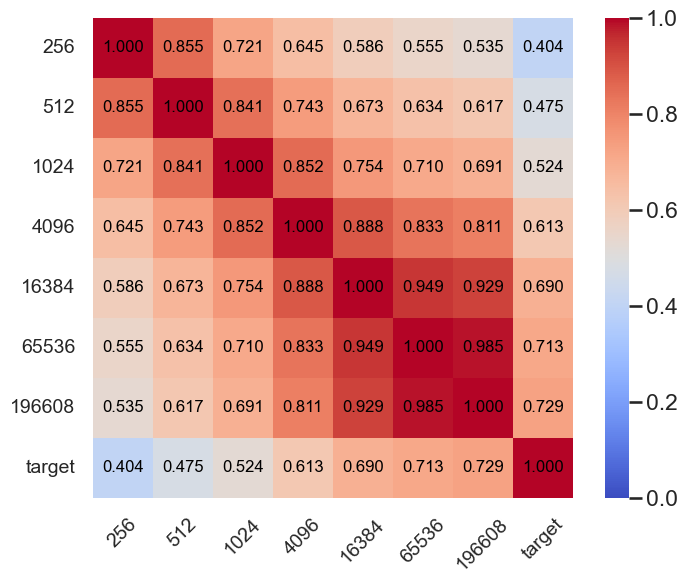

In [4]:
ticklabels = [256, 512, 1024, 4096, 16384, 65536, 196608, 'target']

plt.figure(figsize=(8, 6), dpi=100)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)
sns.heatmap(
    corr, square = True,
    cmap="coolwarm", vmin=0, vmax=1, 
    annot=True, fmt=".3f", annot_kws={"size": 12, 'color': 'black'})
plt.xticks(np.arange(len(ticklabels))+0.5, ticklabels, fontsize=14, rotation=45)
plt.yticks(np.arange(len(ticklabels))+0.5, ticklabels, fontsize=14, rotation=0)

plt.savefig('figures/corr_heatmap_crop_different_length.png', dpi=400)
plt.show()

In [5]:
pred_list_crop = pred_list

# 先截断，然后使用N padding

In [6]:
for cropped_length in [256, 512, 1024, 4096, 16384, 65536, 196608]:
    if not os.path.exists(f'data/Enformer_pred_crop_{cropped_length}_pad_196608_N.npy'):
        model = from_pretrained('../pretrained_models/enformer_weights', target_length=2)
        dataset = SeqLabelDataset(
            data_path='data/enformer_sequences_test_100.csv',
            data_type='seq',
            input_column='seq', 
            crop=True, 
            crop_method='center',
            cropped_length=cropped_length,
            padding=True, 
            padding_method='N',
            padded_length=196608,
            N_fill_value=0)
        
        test_data_loader = DataLoader(dataset, batch_size=4, shuffle=False, num_workers=1)
        y_pred = get_pred(model, test_data_loader)
        np.save(f'data/Enformer_pred_crop_{cropped_length}_pad_196608_N.npy', y_pred)

100%|██████████| 25/25 [00:10<00:00,  2.45it/s]


In [7]:
pred_list = []
for cropped_length in [256, 512, 1024, 4096, 16384, 65536, 196608]:
    pred = np.load(f'data/Enformer_pred_crop_{cropped_length}_pad_196608_N.npy')
    pred_list.append(pred)
target = np.load('data/enformer_targets_test_100_2.npy')
pred_list.append(target)
for i in range(len(pred_list)):
    print(pred_list[i].shape)
pred_list = np.stack(pred_list)

corr = np.corrcoef(pred_list.reshape(pred_list.shape[0], -1))
print(corr)

(100, 2, 5313)
(100, 2, 5313)
(100, 2, 5313)
(100, 2, 5313)
(100, 2, 5313)
(100, 2, 5313)
(100, 2, 5313)
(100, 2, 5313)
[[1.         0.95687593 0.92509994 0.78353314 0.60451214 0.53595207 0.55245101 0.46158723]
 [0.95687593 1.         0.96065354 0.80779485 0.63367904 0.56113959 0.57756551 0.48230786]
 [0.92509994 0.96065354 1.         0.86373382 0.67022476 0.58847736 0.60360497 0.49352426]
 [0.78353314 0.80779485 0.86373382 1.         0.82736448 0.70416378 0.6990342  0.54540972]
 [0.60451214 0.63367904 0.67022476 0.82736448 1.         0.85767269 0.83641256 0.64592012]
 [0.53595207 0.56113959 0.58847736 0.70416378 0.85767269 1.         0.97620824 0.71704844]
 [0.55245101 0.57756551 0.60360497 0.6990342  0.83641256 0.97620824 1.         0.72923541]
 [0.46158723 0.48230786 0.49352426 0.54540972 0.64592012 0.71704844 0.72923541 1.        ]]


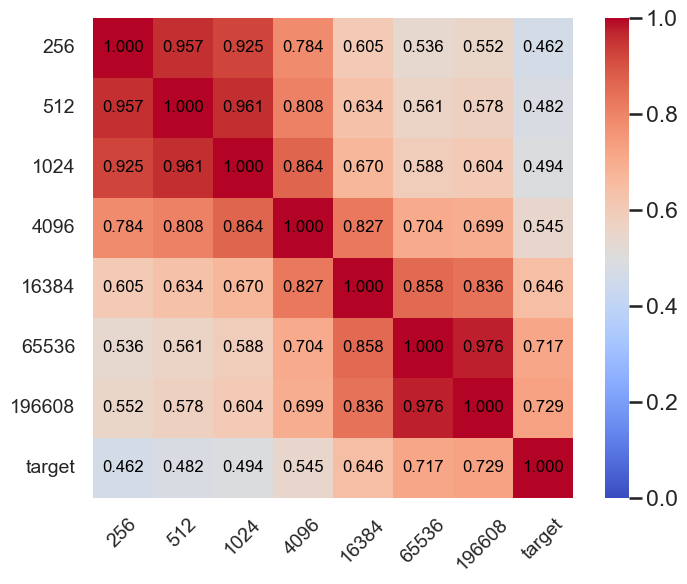

In [8]:
ticklabels = [256, 512, 1024, 4096, 16384, 65536, 196608, 'target']

plt.figure(figsize=(8, 6), dpi=100)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)
sns.heatmap(
    corr, square = True,
    cmap="coolwarm", vmin=0, vmax=1, 
    annot=True, fmt=".3f", annot_kws={"size": 12, 'color': 'black'})
plt.xticks(np.arange(len(ticklabels))+0.5, ticklabels, fontsize=14, rotation=45)
plt.yticks(np.arange(len(ticklabels))+0.5, ticklabels, fontsize=14, rotation=0)

plt.savefig('figures/corr_heatmap_crop_pad_N_different_length.png', dpi=400)
plt.show()

In [9]:
pred_list_crop_pad = pred_list

# 先截断，然后使用N padding，N=0.25

In [10]:
for cropped_length in [256, 512, 1024, 4096, 16384, 65536, 196608]:
    if not os.path.exists(f'data/Enformer_pred_crop_{cropped_length}_pad_196608_N_0.25.npy'):
        model = from_pretrained('../pretrained_models/enformer_weights', target_length=2)
        dataset = SeqLabelDataset(
            data_path='data/enformer_sequences_test_100.csv',
            data_type='seq',
            input_column='seq', 
            crop=True, 
            crop_method='center',
            cropped_length=cropped_length,
            padding=True, 
            padding_method='N',
            padded_length=196608,
            N_fill_value=0.25)
        
        test_data_loader = DataLoader(dataset, batch_size=4, shuffle=False, num_workers=1)
        y_pred = get_pred(model, test_data_loader)
        np.save(f'data/Enformer_pred_crop_{cropped_length}_pad_196608_N_0.25.npy', y_pred)

100%|██████████| 25/25 [00:10<00:00,  2.46it/s]


In [11]:
pred_list = []
for cropped_length in [256, 512, 1024, 4096, 16384, 65536, 196608]:
    pred = np.load(f'data/Enformer_pred_crop_{cropped_length}_pad_196608_N_0.25.npy')
    pred_list.append(pred)
target = np.load('data/enformer_targets_test_100_2.npy')
pred_list.append(target)
for i in range(len(pred_list)):
    print(pred_list[i].shape)
pred_list = np.stack(pred_list)

corr = np.corrcoef(pred_list.reshape(pred_list.shape[0], -1))
print(corr)

(100, 2, 5313)
(100, 2, 5313)
(100, 2, 5313)
(100, 2, 5313)
(100, 2, 5313)
(100, 2, 5313)
(100, 2, 5313)
(100, 2, 5313)
[[1.         0.91095425 0.83326778 0.70498083 0.56223015 0.48564075 0.48722424 0.39830705]
 [0.91095425 1.         0.93921276 0.80495172 0.65153194 0.56471482 0.56610105 0.45487364]
 [0.83326778 0.93921276 1.         0.89039295 0.73469368 0.63325165 0.63455588 0.50046959]
 [0.70498083 0.80495172 0.89039295 1.         0.86430575 0.73891484 0.72858881 0.56085423]
 [0.56223015 0.65153194 0.73469368 0.86430575 1.         0.89625534 0.86701279 0.64727656]
 [0.48564075 0.56471482 0.63325165 0.73891484 0.89625534 1.         0.96616124 0.71237808]
 [0.48722424 0.56610105 0.63455588 0.72858881 0.86701279 0.96616124 1.         0.72923541]
 [0.39830705 0.45487364 0.50046959 0.56085423 0.64727656 0.71237808 0.72923541 1.        ]]


In [12]:
pred_list_crop_pad_025 = pred_list

In [13]:
pred_list = np.stack([pred_list_crop, pred_list_crop_pad, pred_list_crop_pad_025])

In [16]:
for i in range(pred_list.shape[1]):
    data = pred_list[:, i]
    data = data.reshape(data.shape[0], -1)
    corr = np.corrcoef(data)
    print(corr[-1])

[0.46052676 0.71719957 1.        ]
[0.61191216 0.76990987 1.        ]
[0.71003096 0.82759787 1.        ]
[0.81283432 0.84064994 1.        ]
[0.88220634 0.88662425 1.        ]
[0.97101659 0.98593388 1.        ]
[1. 1. 1.]
[1. 1. 1.]
